<a href="https://colab.research.google.com/github/xyzall1/Visualisasi-Data/blob/main/Programming_Assignment_Rosa_NA_Sawafi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ROSA NUR ALIANA SAWAFI || 2311110008**

**Programming Assignment 1: Basic Visualization Techniques**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/old_cars(2).csv")
df.head()

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US


# 1. Visualize for each geographic origin the temporal evolution of the gas mileage from 1970 to 1982 using a line chart. Each data point will correspond to the annual average of the gas mileage for a given origin and each curve will comprise 13 points. Assign a different color to each curve.

<ipython-input-13-8ecce216bef8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mpg_distribution = df.groupby(['MPG Bin', 'Origin']).size().unstack()


<Figure size 1200x600 with 0 Axes>

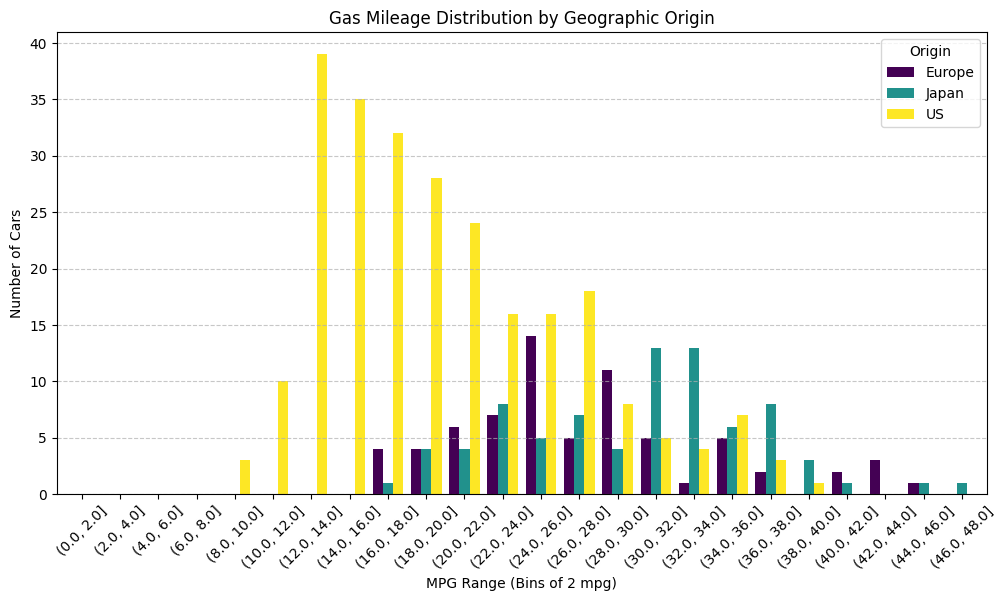

In [ ]:
# Discretize MPG values into 2 mpg bins
df['MPG Bin'] = pd.cut(df['MPG'], bins=np.arange(0, df['MPG'].max() + 2, 2))

# Count the number of cars in each bin for each origin
mpg_distribution = df.groupby(['MPG Bin', 'Origin']).size().unstack()

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
mpg_distribution.plot(kind='bar', stacked=False, width=0.8, colormap='viridis', figsize=(12, 6))

plt.xlabel("MPG Range (Bins of 2 mpg)")
plt.ylabel("Number of Cars")
plt.title("Gas Mileage Distribution by Geographic Origin")
plt.xticks(rotation=45)
plt.legend(title="Origin")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Interpretasi

Dari chart di atas dapat diketahui bahwa:

- Mobil AS lebih boros bahan bakar, karena sebagian besar mobil AS memiliki MPG rendah (sekitar 14-22 MPG).

- Mobil Jepang lebih efisien dalam konsumsi bahan bakar dikarenakan banyak mobil Jepang memiliki MPG tinggi (sekitar 28-38 MPG).

- Mobil Eropa memiliki distribusi MPG yang lebih merata, mencerminkan perpaduan antara efisiensi dan performa serta dapat dilihat mobil Eropa tersebar lebih merata di berbagai rentang MPG, dengan puncaknya di sekitar 22-32 MPG.

# 2. Visualize for each geographic origin the temporal evolution of the gas mileage from 1970 to 1982 using a line chart. Each data point will correspond to the annual average of the gas mileage for a given origin and each curve will comprise 13 points. Assign a different color to each curve.

<Figure size 1200x600 with 0 Axes>

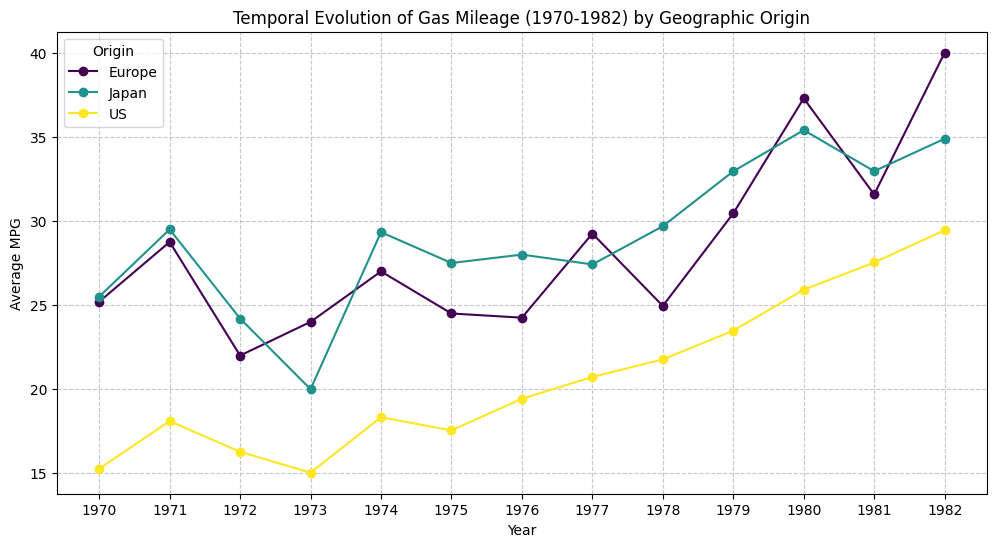

In [ ]:
# Rename 'Model' column to 'Year' for clarity
df.rename(columns={'Model': 'Year'}, inplace=True)

# Compute the annual average MPG for each origin
mpg_trend = df.groupby(['Year', 'Origin'])['MPG'].mean().unstack()

# Plot the line chart
plt.figure(figsize=(12, 6))
mpg_trend.plot(marker='o', linestyle='-', colormap='viridis', figsize=(12, 6))

plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.title("Temporal Evolution of Gas Mileage (1970-1982) by Geographic Origin")
plt.xticks(np.arange(70, 83), labels=np.arange(1970, 1983))  # Convert two-digit years to four-digit labels
plt.legend(title="Origin")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Dari visualisasi di atas dapat diartikan bahwa:

- Jepang memimpin dalam efisiensi bahan bakar, tetapi di tahun 1982 Eropa berhasil mengejar dan bahkan melampauinya.

- AS tertinggal dalam efisiensi, tetapi dari tahun ke tahun AS memiliki peningktan efesiensi yang signifikan meningkat.

- Europe dengan Jepang efesiensi bahan bakarnya selalu berkejaran walaupan dalam rentang beberapa tahun ke belakang perkembangannya masih kalah dengan Jepang namun pada tahun 1982 peningkatannya terlihat drastis mengalahkan Jepang.


# 3. So far, we have only visualized a single attribute (ie. the gas mileage). For this third task, visualize the relationship between horsepower and gas mileage in a scatter plot. The horizontal axis should correspond to the horsepower, the vertical axis to the gas mileage and each data point to a particular car. Apply to the scatter plot a color coding indicating the year.

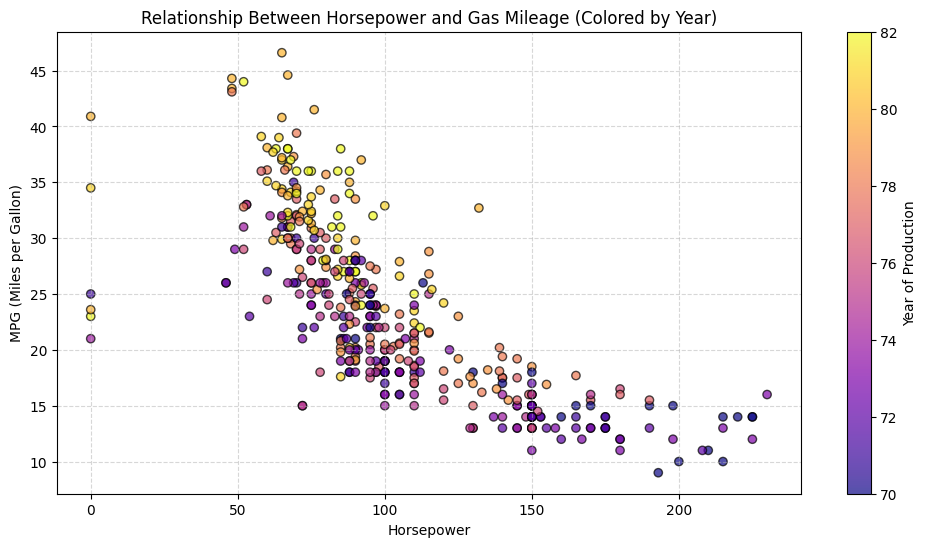

In [ ]:
# Create scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Horsepower'], df['MPG'], c=df['Year'], cmap='plasma', alpha=0.7, edgecolors='k')

# Add color bar to indicate the year
cbar = plt.colorbar(scatter)
cbar.set_label("Year of Production")

# Labels and title
plt.xlabel("Horsepower")
plt.ylabel("MPG (Miles per Gallon)")
plt.title("Relationship Between Horsepower and Gas Mileage (Colored by Year)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


Interpretasi

Dari visualisasi di atas dapat disimpulkan bahwa:

- Ada hubungan negatif antara tenaga mesin dan efisiensi bahan bakar, dikarenakan semakin tinggi horsepower semakin rendah MPG. Hal ini menunjukkan  bahwa mobil dengan mesin lebih bertenaga cenderung lebih boros bahan bakar.

- Mobil keluaran lama (1970-an) cenderung memiliki tenaga lebih besar tetapi lebih boros bahan bakar. Dikarenakan mobil lebih lama (yang warnanya ungu tua, sekitar 1970-1972) lebih terkonsentrasi di horsepower tinggi (100-200 HP) dengan MPG rendah (10-20).

- Mobil keluaran baru (1980-an) lebih hemat bahan bakar dengan tenaga yang lebih rendah. Dikarenakan mobil yang lebih baru (yang warnanya kuning, sekitar 1980-1982) lebih banyak pada horsepower rendah (50-100 HP) tetapi dengan MPG yang lebih tinggi (25-40).

# 4. Visualize gas mileage, weight, horsepower, and engine size in a scatter plot matrix. Color code the individual data points by country of origin.



<Figure size 1000x800 with 0 Axes>

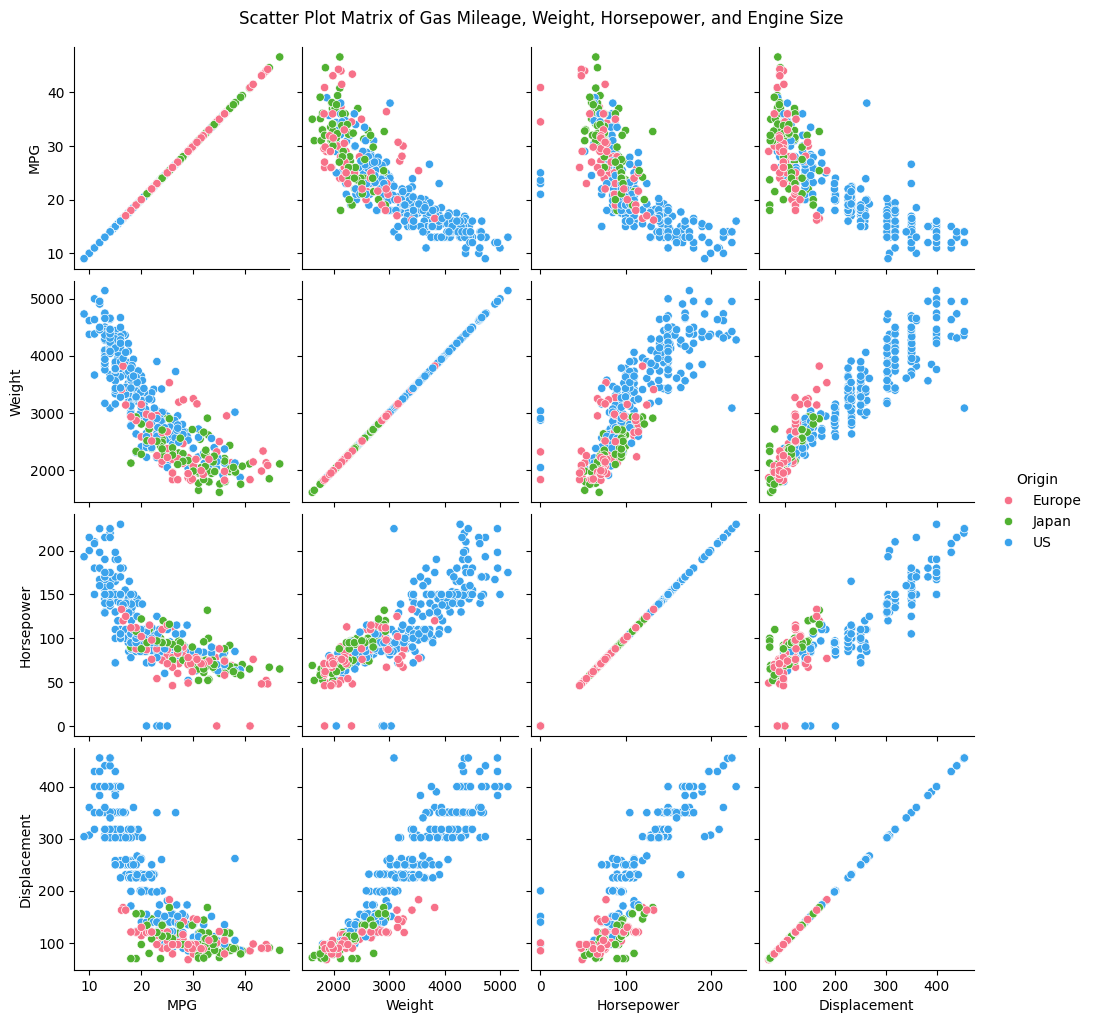

In [ ]:
# Convert "Origin" to categorical type
df["Origin"] = df["Origin"].astype("category")

# Create scatter plot matrix with scatter plots in all cells (including diagonal)
plt.figure(figsize=(10, 8))
plot = sns.pairplot(df, hue="Origin", vars=["MPG", "Weight", "Horsepower", "Displacement"], diag_kind=None, palette="husl")

# Add title
plt.suptitle("Scatter Plot Matrix of Gas Mileage, Weight, Horsepower, and Engine Size", y=1.02)

# Show plot
plt.show()

Interpretasi

Dapat disimpulkan bahwa visualisasi di atas:

1. Hubungan Negatif antara MPG dan Variabel Lainnya

- MPG vs Weight => Semakin berat kendaraan, semakin rendah MPG yang berarti lebih boros.
- MPG vs Horsepower => Semakin tinggi tenaga mesin, semakin rendah MPG yang artinya lebih boros.
- MPG vs Displacement => Semakin besar ukuran mesin, semakin rendah MPG.

2. Hubungan Positif antara Weight, Horsepower, dan Displacement

- Weight vs Horsepower => Mobil lebih berat cenderung memiliki tenaga mesin lebih besar.
- Weight vs Displacement => Mobil lebih berat cenderung memiliki mesin lebih besar.
- Horsepower vs Displacement => Semakin besar mesin, berarti semakin besar tenaga mesin.

3. Perbedaan Berdasarkan Asal Mobil (Origin: Europe, Japan, US)

- Mobil AS (biru) cenderung memiliki berat, horsepower, dan displacement lebih besar, serta MPG lebih rendah (lebih boros).
- Mobil Jepang (hijau) lebih ringan, memiliki mesin lebih kecil, dan lebih hemat bahan bakar (MPG lebih tinggi).
- Mobil Eropa (merah) berada di tengah, dengan karakteristik yang bervariasi tetapi cenderung lebih efisien dibandingkan mobil AS.